# Sentiment Analysis
In this notebook, i'll be using EEG Brainwave Dataset from kaggle. You can get the data from this [link.](https://www.kaggle.com/birdy654/eeg-brainwave-dataset-feeling-emotions/activity)

Let's have a look at the dataset

In [2]:
#import bunch of libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load data
brainwave_df = pd.read_csv('emotions.csv')

In [4]:
brainwave_df.shape

(2132, 2549)

In [5]:
brainwave_df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [5]:
brainwave_df['label'].unique()

array(['NEGATIVE', 'NEUTRAL', 'POSITIVE'], dtype=object)

* So our data has 2132 datapoints. Each datapoint has 2548 input columns and target column named as **label**. Target can take one of three values.['NEGATIVE', 'NEUTRAL', 'POSITIVE']

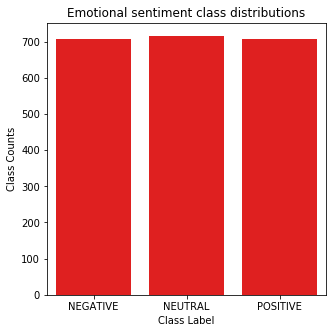

In [6]:
plt.figure(figsize=(5, 5))
sns.countplot(x = brainwave_df['label'], color='red')
plt.title('Emotional sentiment class distributions')
plt.ylabel('Class Counts')
plt.xlabel('Class Label')
plt.show()

* As we can see from plot, all three class types are almost equally distributed. So there is no skewness in data.

* Now let's drop target column to start out modeling

In [6]:
label_df = brainwave_df['label']
brainwave_df.drop('label',axis = 1,inplace = True)
brainwave_df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,74.3,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,130.0,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,-534.0,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,-183.0,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,114.0,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60


* Here dimensionality of data-point is 2548. Due to curse of dimensionality, using any distance based model(like Logistic Regression, Linear SVM) is not a good idea.
* So we'll use tree based ensembles bagging(RandomForest), boosting(XGBoost).
* We'll use **10 fold cross validation** to train each model. we can use **accuracy** as our measurment metrics as data is not skewed. We'll compare mean of accuracy from each cv step.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(brainwave_df, label_df, test_size=0.33, random_state=42)

In [12]:
%%time
#Let's use RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

pipeline_random_forest = Pipeline(steps = [('random_forest', RandomForestClassifier(n_estimators = 100))])

scores = cross_val_score(pipeline_random_forest, X_train, y_train, cv=10, scoring='accuracy')

print('Cross Validation Accuracy for RandomForest: ', scores.mean())

#Now let's see how well our model performs on test data
pipeline_random_forest.fit(X_train, y_train)

y_predicted = pipeline_random_forest.predict(X_test)

test_score = accuracy_score(y_test, y_predicted)

print('Test Score for RandomForest: ', test_score)

Cross Validation Accuracy for RandomForest:  0.98603280111233
Test Score for RandomForest:  0.9786931818181818
Wall time: 30.1 s


* So a basic RandomForest with 100 estimators has shown 98.6% of accuracy. Test accuracy is: 97.87%

* Now let's do hyperparameter tunning to get the best RandomForest model
* First we'll do RandomizedSearch to narrow down our search for hyperparameters. Then we'll use GridSearchCV to get the best hyperparameters

In [18]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [19]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 51.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [20]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [5]:
from sklearn.metrics import accuracy_score

y_predicted = rf_random.predict(X_test)

test_score = accuracy_score(y_test, y_predicted)

print('Test Score for RandomForest: ', test_score) #98.4%

NameError: name 'rf_random' is not defined

* Now let's do GridSearch to get the best hyperparameters

In [10]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [40, 50, 60],
    'max_features': ['auto', 'log2'],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [5, 7, 9],
    'n_estimators': [1200, 1400, 2000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
rf_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 66.9min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed: 86.0min finished


Wall time: 1h 26min 54s


In [12]:
rf_grid_search.best_params_

NameError: name 'rf_grid_search' is not defined

In [13]:
from sklearn.metrics import accuracy_score

y_predicted = rf_grid_search.predict(X_test)

test_score = accuracy_score(y_test, y_predicted)

print('Test Score for RandomForest After GridSearch: ', test_score)

NameError: name 'rf_grid_search' is not defined